# Figure 3e,f

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import phate
import proplot as pplt
import matplotlib
import matplotlib.colors as mcolors
import scprep
import scipy
import seaborn
from scipy.stats import pearsonr
from scipy.stats import zscore
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 100) 

In [ ]:
#Generation of EMD-PHATE and heatmaps in Figure 3e,f
all_data = pd.read_csv('/....../df_gd_all.txt', sep='\t')
all_data.head()

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,2.112668,1.072871,1.784029,36.151936,0.732375,0.000000,1.565820,2.242769,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,1188.507935,2177.531006,21.608774,5.084100,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,0.527830,0.000000,0.000000,40.617779,0.000000,0.850179,0.000000,2.896378,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,1148.690063,2135.051025,11.153146,0.000000,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,0.000000,0.272097,1.360897,12.533136,0.000000,0.000000,0.000000,2.684406,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,1070.468506,1976.926392,16.781635,0.542236,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,0.000000,0.052713,0.000000,33.661613,0.000000,0.317290,0.000000,0.166774,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,833.138000,1527.750000,15.340094,1.247573,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,0.000000,0.425003,0.033936,72.471931,1.903905,3.386223,0.391445,0.000000,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,972.849915,1659.628662,3.891569,0.850994,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,0.000000,0.000000,30.944431,1.578278,4.320772,0.209392,2.607019,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1601.611450,2732.432861,31.009453,1.381068,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,0.000000,0.000000,0.000000,25.492655,1.366826,0.000000,0.807238,0.000000,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000

In [3]:
pre_data = all_data.drop([

 'RFP',
 'Anti-mCherry',
 'EpCAM',
 'PanCK',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Date',
    'Patient',
    'Culture',
    'Transduction',
    'Treatment',
    'Replicate',
    'Time',
    'Cell_type',
    'gd_donor',
    'Batch',    
    
],axis=1, inplace=False)
pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,2.112668,36.151936,0.732375,1.565820,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,5.084100
1,0.527830,40.617779,0.000000,0.000000,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,0.000000
2,0.000000,12.533136,0.000000,0.000000,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,0.542236
3,0.000000,33.661613,0.000000,0.000000,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,1.247573
4,0.000000,72.471931,1.903905,0.391445,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,0.850994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,30.944431,1.578278,0.209392,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1.381068
5819341,0.000000,25.492655,1.366826,0.807238,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000000,44.193893,14.579997,11.834751,30.874540,2.222952,593.606873,33.942799,0.000000,5.484707,1.107356,41.650654,4.079612,2.890662,16.442080,211.754593,41.139343,0.167057,21.065989,0.932406,52.263050,7.510569,4.690210,4.869834,318.626892,14.122758,0.000000,2.388915,0.000000
5819342,0.000000,24.976599,8.353419,0.000000,0.471833,0.000000,0.000000,20.350275,66.372398,6.817601,2.872206,0.000000,10.188087,13.935201,0.000000,27.215403,0.000000,5.833886,1.988676,0.000000,265.788788,49.861317,4.957391,1.605252,0.000000,29.015533,13.465952,0.000000,7.995706,114.426605,14.433770,0.581513,22.458857,1.111541,3.334839,6.933015,1.609262,11.135314,24.247538,4.874505,0.187084,1.576167,2.325908
5819343,2.175176,31.664440,1.766799,7.169693,2.741029,0.000000,0.000000,46.702705,63.867626,25.045683,5.710142,3091.138916,22.184875,51.588818,0.000000,60.380390,22.572739,18.771585,6.463361,2.874717,327.258179,53.740910,5.749938,13.937111,3.208147,60.760220,0.0000

In [4]:
metadata = all_data.filter(['Date','Patient','Culture','gd_donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type'])
metadata['Batch'] = metadata['Batch'].apply(str)
metadata['gd_donor'] = metadata['gd_donor'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)
metadata['Treatment'] = metadata['Treatment'].apply(str)
metadata['Transduction'] = metadata['Transduction'].apply(str)
metadata

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...
5819340,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819342,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819343,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds


In [5]:
subset_pre_data = pre_data.loc[(metadata['Patient'].isin(['X','5','11','21','23','27','75','99','109','141','216'])) & (metadata['gd_donor'].isin(['A','B','E','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch2','Batch4','Batch6','Batch7','Batch8']))]
subset_pre_data


,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,0.000000,34.707291,0.000000,0.000000,0.000000,0.000000,0.000000,21.658829,472.923370,23.141352,8.601446,22.103407,31.870472,47.424408,0.018484,12.103301,7.392933,11.060347,24.470173,35.526260,1161.258667,30.991314,0.000000,12.368027,16.073236,53.671825,0.000000,6.008776,22.241764,240.674149,87.260948,5.924499,3.945853,0.000000,5.440267,35.751488,8.804577,4.400812,29.169230,5.635969,7.820054,21.629023,0.000000
477203,0.000000,14.157574,0.000000,0.000000,0.000000,0.000000,0.000000,13.882650,296.851440,16.756283,12.612571,3.255828,12.925344,26.254704,0.000000,23.200035,0.000000,13.703773,1.997243,24.343845,792.608154,9.255106,0.000000,7.052355,6.512354,27.114666,0.000000,0.110017,2.845665,224.595200,59.615730,11.540479,19.132288,0.000000,7.207807,6.978939,0.000000,0.000000,18.350615,0.000000,5.480089,6.748727,0.000000
477204,0.000000,462.014740,1.668110,0.000000,1.507814,3.138901,0.000000,11.260657,101.655289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.334311,0.000000,0.000000,1.588589,4.981578,216.276596,2.870738,0.000000,0.000000,10.847421,5.684055,0.000000,5.039053,12.555069,141.495621,20.588900,0.000000,0.000000,0.000000,0.271760,13.388305,6.980832,0.000000,26.652905,2.816440,6.579736,8.827875,2.147535
477205,0.000000,22.172516,1.283391,0.000000,0.812709,0.438123,0.000000,18.864975,200.602661,7.845024,5.418871,23.692860,7.627847,17.806017,3.561880,20.336231,0.000000,9.560737,5.191366,0.000000,637.622314,6.697829,0.000000,34.707542,3.337770,4.039658,0.000000,0.000000,12.394520,162.817825,18.507847,0.000000,0.000000,0.000000,11.461474,18.406147,0.000000,4.399421,18.399115,0.000000,8.413734,3.453521,4.314132
477206,0.000000,23.359049,0.000000,0.000000,0.000000,0.000000,0.251297,2.745977,81.909645,0.000000,0.000000,0.000000,8.400867,10.778749,3.622564,20.252939,0.000000,1.076861,68.665955,21.521221,294.875244,13.426810,0.000000,3.656691,4.978725,16.354219,0.000000,0.000000,1.353185,109.419586,10.813177,0.000000,6.957262,0.000000,0.000000,4.159170,0.000000,12.133100,10.652521,0.000000,0.000000,1.877119,0.183443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,0.000000,28.875036,0.000000,0.000000,0.000000,1.075896,1.556081,18.458279,110.446426,0.110063,0.000000,1.561231,5.253989,15.427156,0.000000,23.203382,0.781385,7.251719,0.403637,0.706380,391.153107,42.786880,5.704473,1.420541,11.239607,18.273808,0.452530,0.000000,14.336119,134.614746,6.235890,0.000000,2.107930,0.000000,3.945314,5.040523,2.196426,1.767620,19.031973,0.000000,6.412177,0.917294,0.000000
5382523,0.000000,3.801827,1.189538,0.000000,6.091892,0.000000,0.000000,29.470259,220.379868,4.792118,17.330170,8.546122,15.475215,16.007704,0.000000,17.011972,0.000000,16.371639,0.788106,0.023557,508.026337,9.662008,0.000000,0.000000,9.376084,13.658239,0.000000,0.383715,2.928666,278.672150,50.677357,0.087827,10.470968,0.000000,1.934739,12.934807,4.684712,0.000000,16.418653,3.321466,1.956694,7.711249,0.000000
5382524,0.000000,51.180542,0.000000,0.000000,0.000000,4.040262,0.000000,2.260488,91.769936,3.831644,0.000000,36.118465,5.222328,32.752560,0.000000,18.954603,0.000000,6.867979,10.537904,1.168641,307.091980,41.874817,2.923684,3.059006,4.524865,7.214482,0.000000,4.725778,2.936836,118.396957,7.571368,0.089310,39.727184,2.572815,0.642275,4.521135,0.193477,54.202286,14.061462,1.303217,0.562369,0.000000,0.000000
5382525,0.547464,38.701290,0.648193,0.000000,0.000000,0.000000,0.000000,4.264005,118.641479,6.323226,0.000000,14.799616,12.604033,11.217786,0.000000,32.132008,0.000000,6.986883,13.770410,1.540707,420.078522,92.301033,6.741317,17.608044,1.902665,12.46898

In [6]:
subset_metadata = metadata.loc[(metadata['Patient'].isin(['X','5','11','21','23','27','75','99','109','141','216'])) & (metadata['gd_donor'].isin(['A','B','E','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch2','Batch4','Batch6','Batch7','Batch8']))]
subset_metadata

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
477202,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477203,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477204,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477205,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477206,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...
5382522,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382523,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382524,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382525,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds


In [7]:
as_data = np.arcsinh(subset_pre_data/5)
as_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,0.000000,2.635808,0.000000,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.000000,1.637384,1.884223,3.068760,0.000000,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.000000,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000
477203,0.000000,1.763776,0.000000,0.000000,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.000000,1.144053,1.079957,2.392179,0.000000,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.000000,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000
477204,0.000000,5.219335,0.327724,0.000000,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.000000,0.000000,1.516960,0.974883,0.000000,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.000000,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291
477205,0.000000,2.195040,0.253940,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.000000,2.635815,0.625883,0.738850,0.000000,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.000000,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979
477206,0.000000,2.245956,0.000000,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.000000,0.678151,0.878362,1.900784,0.000000,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.000000,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,0.000000,2.454100,0.000000,0.000000,0.000000,0.213552,0.306400,2.017081,3.788752,0.022011,0.000000,0.307383,0.916841,1.845122,0.000000,2.239419,0.155648,1.166899,0.080640,0.140810,5.052849,2.843337,0.977578,0.280419,1.549313,2.007390,0.090383,0.000000,1.775601,3.986471,1.045829,0.000000,0.410002,0.000000,0.724105,0.887093,0.426259,0.346546,2.046654,0.000000,1.067696,0.182445,0.000000
5382523,0.000000,0.701419,0.235719,0.000000,1.027686,0.000000,0.000000,2.474211,4.479191,0.851667,1.956347,1.305488,1.848081,1.880323,0.000000,1.938555,0.000000,1.901802,0.156976,0.004711,5.314267,1.412989,0.000000,0.000000,1.386396,1.729987,0.000000,0.076668,0.556553,4.713826,3.011613,0.017565,1.484984,0.000000,0.377890,1.679052,0.836075,0.000000,1.904545,0.623169,0.381982,1.217973,0.000000
5382524,0.000000,3.021446,0.000000,0.000000,0.000000,0.738944,0.000000,0.437962,3.603735,0.706159,0.000000,2.675270,0.912469,2.578466,0.000000,2.042715,0.000000,1.122538,1.490737,0.231651,4.810923,2.821939,0.555693,0.578918,0.812559,1.162665,0.000000,0.842056,0.557962,3.858198,1.202655,0.017861,2.769682,0.494199,0.128104,0.812006,0.038686,3.078553,1.757355,0.257779,0.112238,0.000000,0.000000
5382525,0.109275,2.743729,0.129278,0.000000,0.000000,0.000000,0.000000,0.773370,3.860259,1.056709,0.000000,1.805696,1.654931,1.547538,0.000000,2.559561,0.000000,1.136456,1.737672,0.303462,5.124186,3.609497,1.107538,1.971640,0.371901,1.644925,0.242105,0.976251,1.619874,4.138278,1.632543,0.000000,0.000000,0.157120,0.814651,1.389471,0.000000,2.067664,2.437632,0.378945,0.000000,0.280705,0.000

In [8]:
as_data_centered = scprep.normalize.batch_mean_center(as_data,sample_idx=subset_metadata['Batch'])
as_data_centered

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691
477203,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691
477204,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600
477205,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289
477206,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579
5382523,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0.102619,-0.175471,-0.696420,0.119285,-0.066551,-1.437571,-1.122719,-0.070828,-0.156389,0.448539,-0.176579
5382524,-0.132664,0.393754,-0.267071,-0.175566,-0.562524,-0.464932,-0.175128,-1.970917,-0.579099,-0.322676,-1.208338,1.161373,-0.619085,0.186990,-0.207593,-0.531998,-0.503427,-0.169705,0.042202,-0.874990,-0.480460,-0.114102,-0.209174,-0.172723,-0.292395,-0.963018,-0.295503,0.008832,-0.645440,-0.580340,-0.801542,-0.269770,1.387317,0.318729,-0.946205,-0.747762,-0.863940,1.640982,-1.269909,-0.436218,-0.426133,-0.769434,-0.176579
5382525,-0.023388,0.116037,-0.137793,-0.175566,-0.562524,-1.203876,-0.175128,-1.635509,-0.322575,0.027874,-1.208338,0.291799,0.123377,-0.84

In [9]:
data_as_meta = pd.concat([as_data_centered, subset_metadata], axis=1)
data_as_meta

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
477202,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477203,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477204,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477205,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477206,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382523,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0.102619,-0.175471,-0.696420,0.119285,-0.066551,-1.437571,-1.122719,-0.070828,-0.156389,0.448539,-0.176579,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382524,-0.132664,0.393754,-0.267071,-0.175566,-0.562524,-0.464932,-0.175128,-1.970917,-0.5

In [10]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Patient'] = data_as_meta['Patient'].apply(str)
data_as_meta['Culture'] = data_as_meta['Culture'].apply(str)
data_as_meta['gd_donor'] = data_as_meta['gd_donor'].apply(str)
data_as_meta['Transduction'] = data_as_meta['Transduction'].apply(str)
data_as_meta['Treatment'] = data_as_meta['Treatment'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Batch'] = data_as_meta['Batch'].apply(str)

In [11]:
full_data = data_as_meta
full_data['Condition'] = full_data['Patient'] + '_' + full_data['Culture'] + '_' + full_data['gd_donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Batch'] + '_' + full_data['Date'] + '_' + full_data['Replicate']
grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
1,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
2,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
3,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
4,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101323,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds,141_PDOgd_E_eGFP-stIL15_BM_Batch8_20230201_C
4101324,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0

In [12]:
#Define control for pairwise EMD. Everything compared to monoculture conditions, acounting for each gd donor and treatment.
full_data["Control"] =  "X_gd_" + full_data["gd_donor"] + '_' + full_data["Transduction"] + '_' +  full_data["Treatment"] + '_' +  full_data["Batch"] + '_' + full_data['Date']


In [13]:
full_data.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition,Control
0,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
1,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
2,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
3,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
4,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614


In [14]:
no_metadata = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691
1,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691
2,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600
3,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289
4,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101323,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579
4101324,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0.102619,-0.175471,-0.696420,0.119285,-0.066551,-1.437571,-1.122719,-0.070828,-0.156389,0.448539,-0.176579
4101325,-0.132664,0.393754,-0.267071,-0.175566,-0.562524,-0.464932,-0.175128,-1.970917,-0.579099,-0.322676,-1.208338,1.161373,-0.619085,0.186990,-0.207593,-0.531998,-0.503427,-0.169705,0.042202,-0.874990,-0.480460,-0.114102,-0.209174,-0.172723,-0.292395,-0.963018,-0.295503,0.008832,-0.645440,-0.580340,-0.801542,-0.269770,1.387317,0.318729,-0.946205,-0.747762,-0.863940,1.640982,-1.269909,-0.436218,-0.426133,-0.769434,-0.176579
4101326,-0.023388,0.116037,-0.137793,-0.175566,-0.562524,-1.203876,-0.175128,-1.635509,-0.322575,0.027874,-1.208338,0.291799,0.123377,-0.843938,-0.207593,-0.015152,

In [15]:
marker_list = list(no_metadata.columns.values)
coculture_emds = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)
control_list = pd.unique(full_data['Control'].tolist())

In [16]:
 for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data.loc[full_data["Condition"].str.startswith(control_line.values[0])]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    coculture_emds.loc[condition, marker] = signed_emd

assert not coculture_emds.isna().values.any()

X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_E_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_E_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_E_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_E_eGFP-stIL15_BM_Batch2_20220614
X_gd_E_eGFP-stIL15_BM_Batch2_20220614
X_gd_E_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP

In [17]:
cocul_emd_df = coculture_emds.reset_index()
cocul_emd_df[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = cocul_emd_df['index'].str.split('_', expand=True)
cocul_emd_df.head()

,index,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate
0,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,0.006308,0.019151,0.002605,-0.001773,0.009319,0.050850,0.004677,0.020586,-0.032820,0.004248,-0.010089,-0.006327,0.023941,-0.009348,-0.003213,0.049306,0.009679,0.013048,0.042267,-0.013548,-0.012546,0.062261,0.003462,-0.010639,-0.025898,0.036077,0.003073,0.027571,0.005568,0.022951,0.020366,0.006095,0.049776,0.005283,0.018987,-0.010891,-0.008110,0.051319,0.030859,0.006829,0.007621,0.056941,-0.008481,X,gd,7,eGFP-stIL15,B7C18,Batch2,20220614,A
1,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_B,0.002828,0.012649,0.005827,0.002611,-0.011388,0.020551,-0.005268,-0.014622,0.010968,0.004538,-0.028999,-0.022571,-0.024051,-0.013892,-0.027580,0.011650,0.004284,-0.010581,-0.037921,0.007748,-0.016201,-0.011145,-0.002165,-0.011106,-0.007649,-0.016796,-0.004729,-0.010768,0.006950,-0.013981,-0.023600,-0.003624,-0.023665,-0.007645,-0.040362,-0.012869,-0.011172,-0.022396,-0.013003,-0.008961,-0.016829,-0.017800,0.003325,X,gd,7,eGFP-stIL15,B7C18,Batch2,20220614,B
2,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_C,-0.008157,-0.030974,-0.007880,-0.001907,0.004505,-0.057359,0.002814,-0.008027,0.024266,-0.005695,0.036571,0.025006,-0.007398,0.012084,0.025186,-0.057366,-0.006892,-0.012471,0.025305,0.009682,0.017059,-0.059172,-0.001901,0.021294,0.027983,-0.021904,0.003806,-0.017614,-0.009123,-0.016292,0.008998,0.002953,-0.027567,0.002796,0.024870,0.014492,0.018663,-0.031364,-0.019137,0.003574,0.009994,-0.044166,0.007103,X,gd,7,eGFP-stIL15,B7C18,Batch2,20220614,C
3,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,-0.003497,-0.019350,-0.008636,-0.007719,-0.007549,-0.036853,-0.005123,-0.008920,0.006833,0.006031,-0.012075,-0.015298,-0.010523,-0.017704,0.002617,-0.039905,-0.005555,-0.018391,-0.027376,-0.003518,-0.018043,-0.045980,-0.017125,-0.015257,0.003332,-0.023676,-0.002790,-0.018270,-0.013167,-0.022242,-0.008934,-0.006402,-0.022271,-0.003665,-0.021153,-0.011163,-0.007953,-0.043493,-0.020290,-0.006278,-0.008047,-0.027649,0.006869,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,A
4,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.002225,0.013680,0.008846,0.005320,0.012224,0.047096,0.004328,0.018932,-0.009088,-0.008131,0.030324,0.020984,0.022062,0.024045,0.005748,0.032244,0.012052,0.011849,0.049550,0.005478,0.014638,0.055568,0.020282,0.014307,-0.006000,0.034636,0.007116,0.015789,0.005617,0.025175,0.020953,0.007105,0.038311,0.002909,0.043663,0.009467,0.017230,0.053915,0.026142,0.009365,0.015766,0.049404,-0.009522,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,B


In [18]:
cocul_meta = cocul_emd_df.drop(['index'],axis=1, inplace=False)
cocul_meta.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)
cocul_meta.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.006308   
                                                                B          0.002828   
                                                                C         -0.008157   
                                      BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.019151   
                                                                B          0.012649   
                                                                C         -0.030974   
                                      BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.002605   
                                                                B          0.005827   
                                                                C         -0.007880   
                                      BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.001773   
                                                                B          0.002611   
                                                                C         -0.001907   
                                      BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.009319   
                                                                B         -0.011388   
                                                                C          0.004505   
                                      BM        Batch2 20220614 A         -0.007549   
                                                                B          0.012224   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.050850   
                                                                B          0.020551   
                                                                C         -0.057359   
                                      BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.004677   
                                                                B         -0.005268   
                                                                C      

In [19]:
data = cocul_meta.drop([    
 'pAMPKa',
 'GFP'
    ],axis=1, inplace=False)
data.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.006308   
                                                                B          0.002828   
                                                                C         -0.008157   
                                      BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.019151   
                                                                B          0.012649   
                                                                C         -0.030974   
                                      BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.002605   
                                                                B          0.005827   
                                                                C         -0.007880   
                                      BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.001773   
                                                                B          0.002611   
                                                                C         -0.001907   
                                      BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.050850   
                                                                B          0.020551   
                                                                C         -0.057359   
                                      BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.004677   
                                                                B         -0.005268   
                                                                C          0.002814   
                                      BM        Batch2 20220614 A         -0.005123   
                                                                B          0.004328   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A           0.020586   
                                                                B          -0.014622   
                                                                C  

In [20]:
data['meanEMD'] = data.abs().mean(axis=1)
data.head()


pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.006308   
                                                                B          0.002828   
                                                                C         -0.008157   
                                      BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.019151   
                                                                B          0.012649   
                                                                C         -0.030974   
                                      BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.002605   
                                                                B          0.005827   
                                                                C         -0.007880   
                                      BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.001773   
                                                                B          0.002611   
                                                                C         -0.001907   
                                      BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.050850   
                                                                B          0.020551   
                                                                C         -0.057359   
                                      BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.004677   
                                                                B         -0.005268   
                                                                C          0.002814   
                                      BM        Batch2 20220614 A         -0.005123   
                                                                B          0.004328   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A           0.020586   
                                                                B          -0.014622   
                                                                C  

In [21]:
xEMD_data = data.reset_index()
xEMD_data_AIC = xEMD_data.loc[(xEMD_data['Treatment'].isin(['BM']))&(xEMD_data['Culture'].isin(['PDOgd']))]
xEMD_data_AIC.head()


,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate,pHH3,Vimentin,B7C23,B7C18,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,meanEMD
27,27,PDOgd,7,eGFP-stIL15,BM,Batch2,20220614,A,-0.016220,-0.322359,-0.052448,-0.021350,-0.671054,-0.011507,-0.122734,-0.018017,-0.023081,0.045294,-0.094942,-0.013314,-0.050092,0.005415,-0.176659,-0.046877,-0.068362,-0.205516,-0.083755,-0.086562,-0.165430,0.032936,-0.126023,-0.013055,-0.010277,-0.122616,-0.388696,0.122909,-0.011748,-0.048019,-0.133577,-0.025519,-0.038897,-0.108662,-0.042165,-0.093431,0.410901,0.031638,-0.029088,-0.126356,-0.038751,0.103811
28,27,PDOgd,7,eGFP-stIL15,BM,Batch2,20220614,B,-0.019720,-0.325180,-0.046403,-0.020965,-0.648191,-0.009815,-0.128212,0.047117,-0.016238,0.118470,-0.046807,-0.032483,-0.054009,-0.003220,-0.187601,-0.047278,-0.066183,-0.208941,-0.026555,-0.080670,-0.173957,0.027346,-0.124905,0.022774,-0.007846,-0.118614,-0.351872,0.130405,-0.022866,-0.050108,-0.127261,-0.025045,0.029506,-0.084040,-0.028497,-0.091868,0.439169,0.028592,-0.044225,-0.211564,-0.019555,0.104733
29,27,PDOgd,7,eGFP-stIL15,BM,Batch2,20220614,C,-0.018498,-0.376012,-0.055733,-0.023506,-0.611314,-0.009381,-0.108567,0.098931,0.028228,0.181962,0.109031,0.040464,0.071586,0.047167,-0.211731,-0.034301,-0.058535,-0.167937,0.051118,-0.074038,-0.175581,0.042924,-0.098924,0.063557,0.003665,-0.108995,-0.329571,0.143606,0.029737,-0.044655,-0.105259,-0.022489,0.066421,-0.071405,0.024268,-0.067012,0.515520,0.053780,-0.024037,-0.118869,-0.017243,0.109892
33,27,PDOgd,A,eGFP-stIL15,BM,Batch2,20220614,A,-0.009533,-0.286340,-0.047610,-0.022958,-0.237781,-0.007544,-0.057570,0.140933,0.066350,0.186269,0.105113,0.061438,0.097208,0.023804,-0.107797,0.007972,0.052638,-0.190810,0.012270,-0.064846,-0.129940,0.068611,-0.156778,0.105954,0.009020,0.050835,-0.173337,0.213997,0.080295,-0.007463,-0.092831,-0.010264,0.097282,-0.055074,-0.017334,-0.109854,0.435689,0.045107,-0.012847,-0.051794,-0.004976,0.090636
34,27,PDOgd,A,eGFP-stIL15,BM,Batch2,20220614,B,-0.006762,-0.301407,-0.057081,-0.028342,-0.258689,-0.015115,-0.059500,0.138049,0.059911,0.186539,0.090731,0.060245,0.096532,0.018110,-0.106944,-0.011470,0.044823,-0.234615,0.029174,-0.066339,-0.161740,0.050437,-0.166848,0.098708,0.009402,0.053781,-0.169936,0.201521,0.068922,-0.019192,-0.107583,-0.018081,0.083111,-0.070590,-0.021049,-0.146676,0.460574,0.049148,-0.021907,-0.053205,-0.010968,0.095457


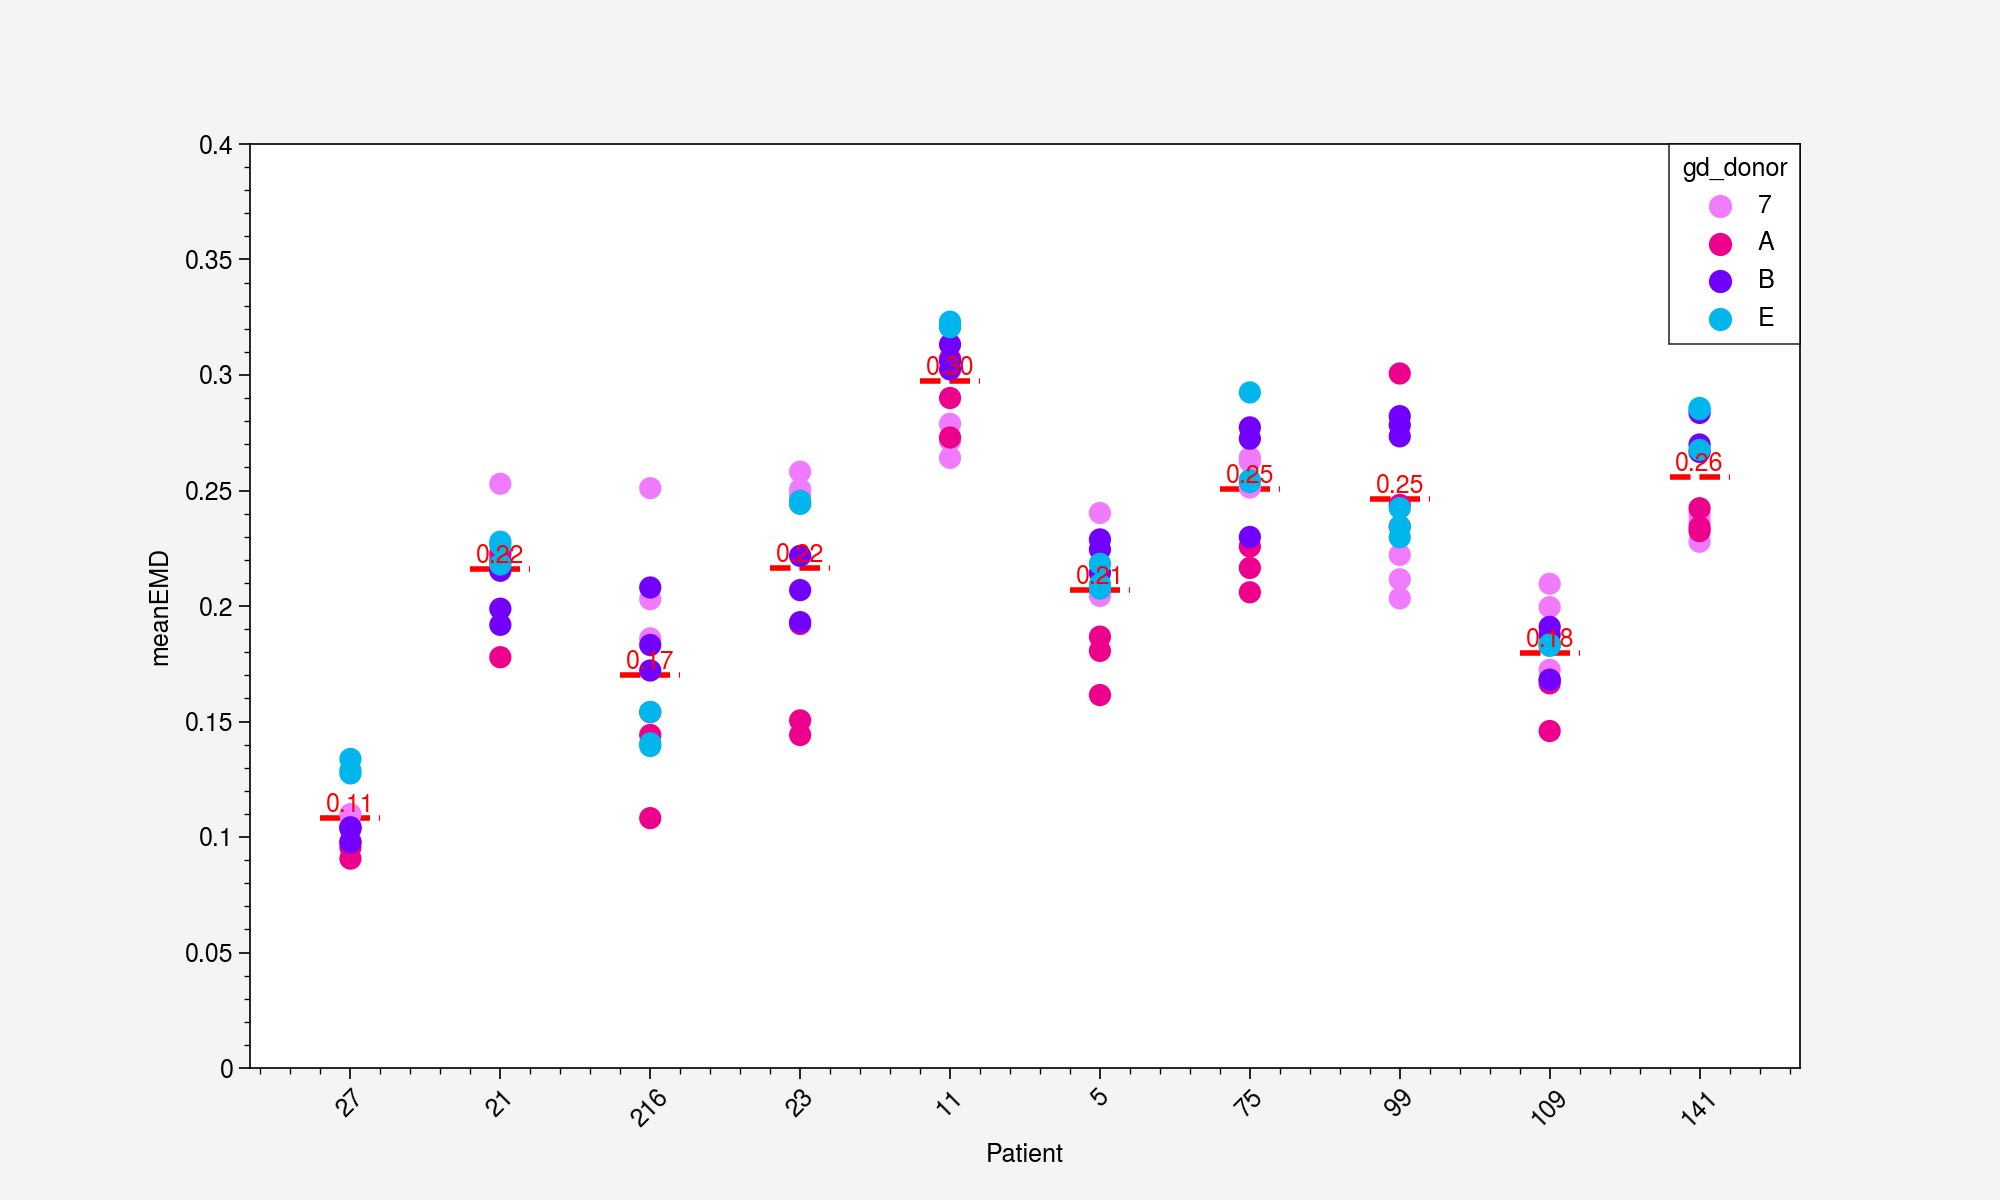

In [22]:
import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}
patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=xEMD_data_AIC,
    x="Patient",
    y="meanEMD",
    jitter=False,  
    size=8,
    hue="gd_donor",
    palette=donor  
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.4)

for donor_group in xEMD_data_AIC['Patient'].unique():
    data_subset = xEMD_data_AIC[xEMD_data_AIC['Patient'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(xEMD_data_AIC['Patient'].unique()).index(donor_group)
    y_coord = mean_value
    
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')


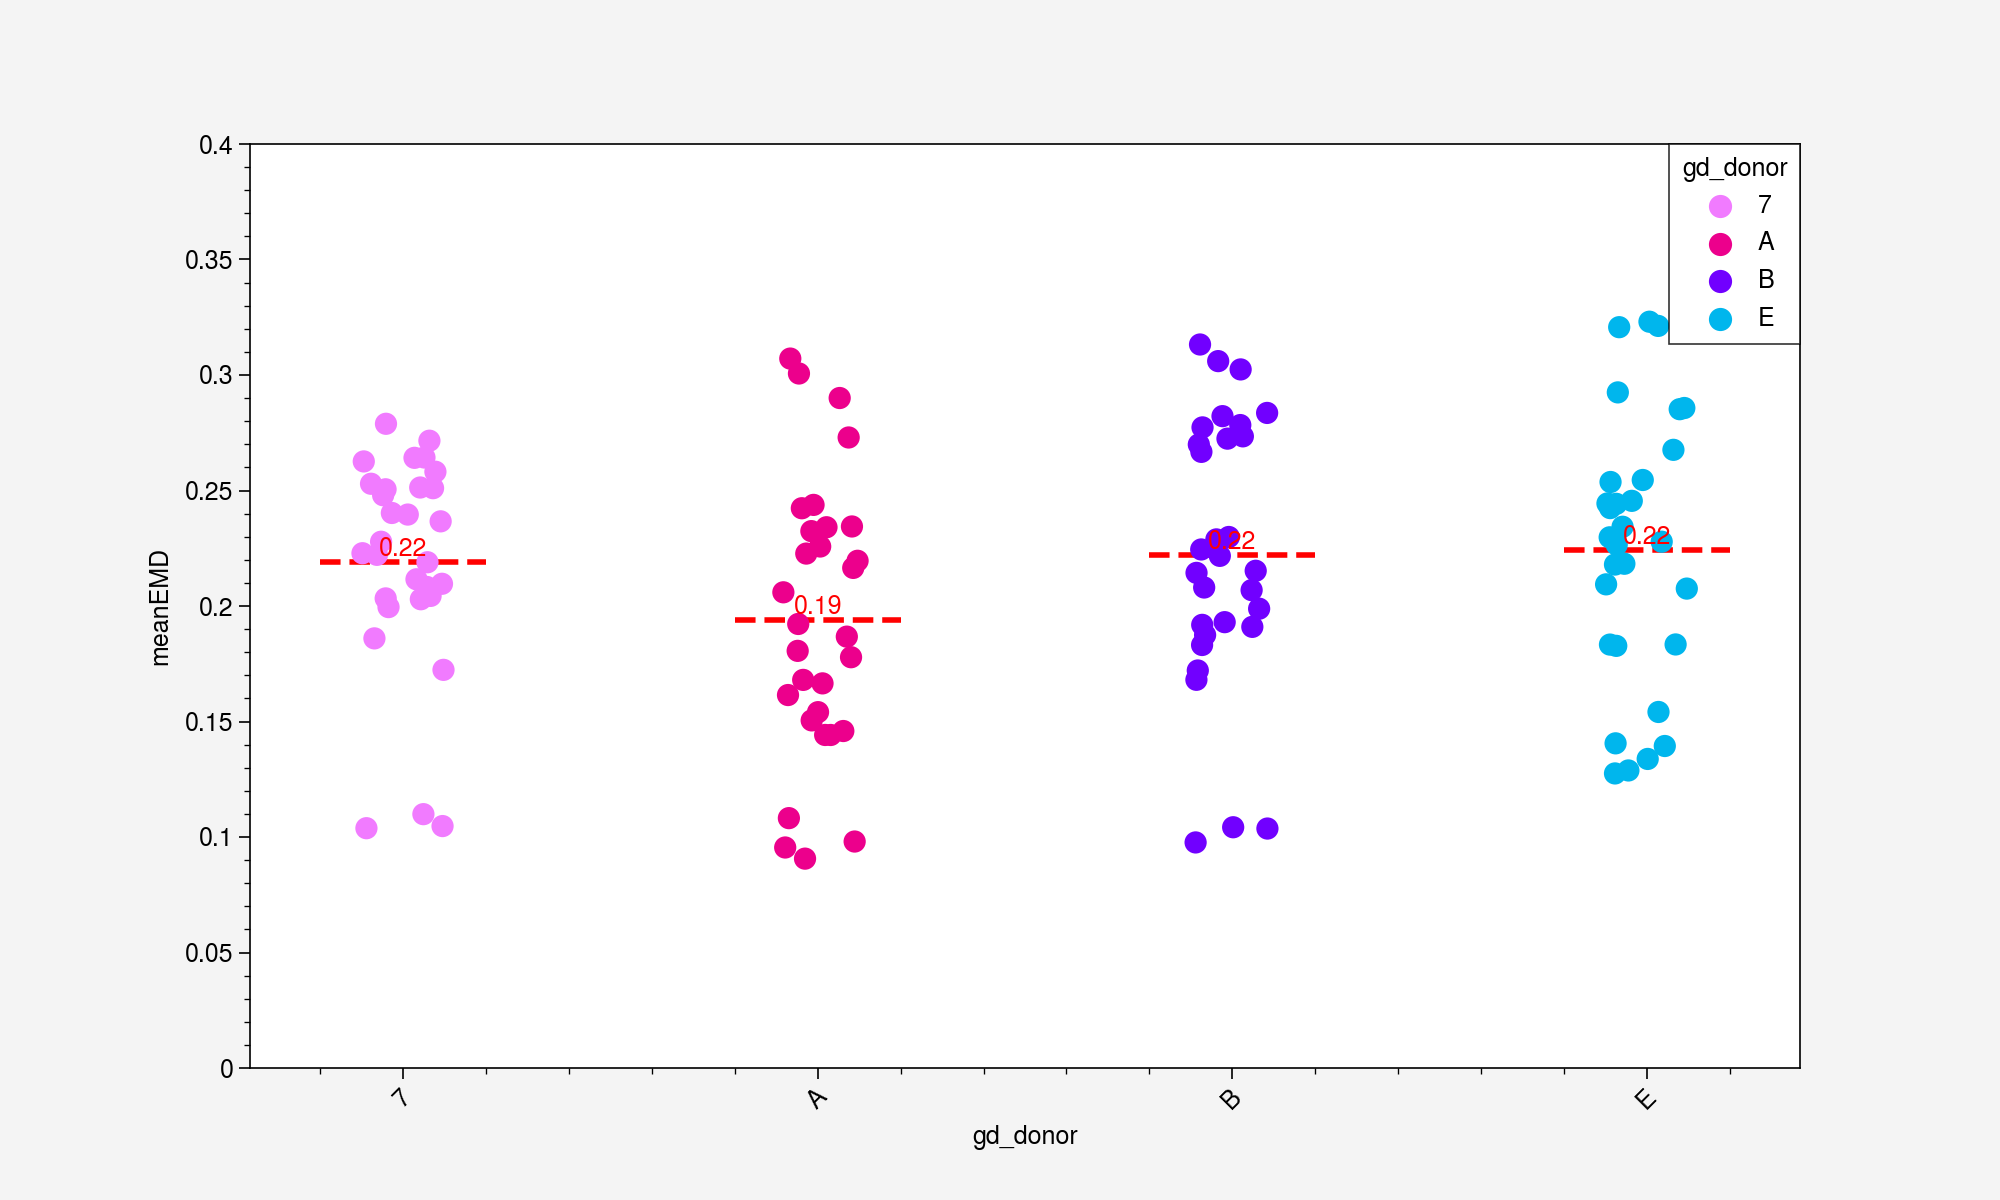

In [25]:
import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}
patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=xEMD_data_AIC,
    x="gd_donor",
    y="meanEMD",
    jitter=True,  
    size=8,
    hue="gd_donor",
    palette=donor  
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.4)

for donor_group in xEMD_data_AIC['gd_donor'].unique():
    data_subset = xEMD_data_AIC[xEMD_data_AIC['gd_donor'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(xEMD_data_AIC['gd_donor'].unique()).index(donor_group)
    y_coord = mean_value
    
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')


In [27]:
#Calculate EMD scores during addition of B7-H3 mAb to calculate xEMD
full_data_ADCC = data_as_meta.loc[(data_as_meta['Culture'].isin(['PDOgd']))]
full_data_ADCC.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition,Control
324202,0.193706,-1.333814,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-1.755625,0.487920,-0.990099,0.197051,0.212498,-1.033544,0.335356,0.346992,-0.660572,-0.574167,-1.118689,0.110345,-0.942590,0.185460,-0.404159,-0.004833,0.375272,0.417237,-0.439694,-0.241373,-0.493305,-0.979933,-0.137219,-0.484603,-0.262638,-0.546288,-0.209047,-0.884204,0.422818,-0.934759,-0.856541,-1.879811,-0.784855,-0.466572,-0.663236,-0.311691,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
324203,-0.140386,-0.485544,-0.020214,-0.163049,-0.546332,-1.436878,-0.096904,0.529312,0.942646,0.251581,1.241507,-0.960815,0.286809,0.371408,-0.262663,1.080387,-0.574167,1.380560,1.123584,2.426831,0.667185,0.264306,-0.547431,-0.701156,0.946236,0.649146,0.411089,0.214474,0.071097,0.637562,0.660722,-0.317503,0.228321,-0.209047,0.559035,0.889491,-0.934759,0.589598,1.569043,0.139587,0.648831,0.814750,1.396562,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
324204,0.661643,-0.325893,-0.099008,0.890642,-0.546332,-1.436878,-0.096904,0.583397,0.383232,0.979710,0.122119,0.459213,0.402798,0.846054,-0.412851,0.955628,0.367163,-0.280453,-0.215622,-0.664561,0.429550,0.320826,1.003092,0.831706,0.771583,0.339262,0.574306,-1.019206,1.297749,0.583228,0.264261,-0.317503,0.776002,-0.184464,1.382235,0.023103,-0.623977,0.464160,1.188432,0.640783,-0.883751,-0.197843,0.724422,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
324205,-0.140386,-0.412667,0.378452,-0.163049,-0.546332,-1.436878,-0.096904,-1.695169,-0.911990,0.280432,-0.081795,0.492604,0.343439,-0.068547,-0.339878,-1.311702,-0.049871,0.177526,0.097571,-0.942590,-0.203456,0.183901,0.225810,-0.701156,-0.316836,0.346254,-0.241373,0.075859,0.168580,-0.199148,-0.033530,-0.301179,1.048141,-0.209047,-1.027772,-0.738934,0.184699,-0.803306,0.204018,0.979979,0.253475,0.231363,-0.311691,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
324206,0.412663,-0.254061,-0.223186,-0.084491,-0.546332,-0.472646,-0.096904,-1.755625,-1.331973,-0.200908,0.547948,0.770299,-1.703630,-0.221769,0.664485,-0.426767,-0.574167,0.205977,1.057615,0.346074,-0.075047,0.275944,-0.547431,1.031061,-0.141980,0.193297,-0.241373,0.944356,-1.042004,-0.122177,-0.930544,0.272353,0.224686,-0.209047,-1.027772,-0.519564,0.665346,-0.180689,-0.140555,-0.556157,-0.702770,0.356477,-0.311691,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614


In [28]:
full_data_ADCC['Condition'] = full_data_ADCC['Patient'] + '_' + full_data_ADCC['Culture'] + '_' + full_data_ADCC['gd_donor'] + '_' + full_data_ADCC['Transduction'] + '_' + full_data_ADCC['Treatment'] + '_' + full_data_ADCC['Batch'] + '_' + full_data_ADCC['Date'] + '_' + full_data_ADCC['Replicate']
grouped = full_data_ADCC.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data_ADCC.index = np.arange (full_data_ADCC.shape[0])
condition_list_ADCC = pd.unique(full_data_ADCC['Condition'].tolist())
full_data_ADCC.head()

/var/folders/x8/f_wldy753hb72b1q_11gzz840000gn/T/ipykernel_48837/224689778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_ADCC['Condition'] = full_data_ADCC['Patient'] + '_' + full_data_ADCC['Culture'] + '_' + full_data_ADCC['gd_donor'] + '_' + full_data_ADCC['Transduction'] + '_' + full_data_ADCC['Treatment'] + '_' + full_data_ADCC['Batch'] + '_' + full_data_ADCC['Date'] + '_' + full_data_ADCC['Replicate']


,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition,Control
0,0.193706,-1.333814,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-1.755625,0.487920,-0.990099,0.197051,0.212498,-1.033544,0.335356,0.346992,-0.660572,-0.574167,-1.118689,0.110345,-0.942590,0.185460,-0.404159,-0.004833,0.375272,0.417237,-0.439694,-0.241373,-0.493305,-0.979933,-0.137219,-0.484603,-0.262638,-0.546288,-0.209047,-0.884204,0.422818,-0.934759,-0.856541,-1.879811,-0.784855,-0.466572,-0.663236,-0.311691,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
1,-0.140386,-0.485544,-0.020214,-0.163049,-0.546332,-1.436878,-0.096904,0.529312,0.942646,0.251581,1.241507,-0.960815,0.286809,0.371408,-0.262663,1.080387,-0.574167,1.380560,1.123584,2.426831,0.667185,0.264306,-0.547431,-0.701156,0.946236,0.649146,0.411089,0.214474,0.071097,0.637562,0.660722,-0.317503,0.228321,-0.209047,0.559035,0.889491,-0.934759,0.589598,1.569043,0.139587,0.648831,0.814750,1.396562,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
2,0.661643,-0.325893,-0.099008,0.890642,-0.546332,-1.436878,-0.096904,0.583397,0.383232,0.979710,0.122119,0.459213,0.402798,0.846054,-0.412851,0.955628,0.367163,-0.280453,-0.215622,-0.664561,0.429550,0.320826,1.003092,0.831706,0.771583,0.339262,0.574306,-1.019206,1.297749,0.583228,0.264261,-0.317503,0.776002,-0.184464,1.382235,0.023103,-0.623977,0.464160,1.188432,0.640783,-0.883751,-0.197843,0.724422,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
3,-0.140386,-0.412667,0.378452,-0.163049,-0.546332,-1.436878,-0.096904,-1.695169,-0.911990,0.280432,-0.081795,0.492604,0.343439,-0.068547,-0.339878,-1.311702,-0.049871,0.177526,0.097571,-0.942590,-0.203456,0.183901,0.225810,-0.701156,-0.316836,0.346254,-0.241373,0.075859,0.168580,-0.199148,-0.033530,-0.301179,1.048141,-0.209047,-1.027772,-0.738934,0.184699,-0.803306,0.204018,0.979979,0.253475,0.231363,-0.311691,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
4,0.412663,-0.254061,-0.223186,-0.084491,-0.546332,-0.472646,-0.096904,-1.755625,-1.331973,-0.200908,0.547948,0.770299,-1.703630,-0.221769,0.664485,-0.426767,-0.574167,0.205977,1.057615,0.346074,-0.075047,0.275944,-0.547431,1.031061,-0.141980,0.193297,-0.241373,0.944356,-1.042004,-0.122177,-0.930544,0.272353,0.224686,-0.209047,-1.027772,-0.519564,0.665346,-0.180689,-0.140555,-0.556157,-0.702770,0.356477,-0.311691,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614


In [29]:
#Define control for pairwise EMD. All co-cultures compared to untreated co-culture control.
full_data_ADCC["Control"] =  full_data_ADCC['Patient'] + '_PDOgd_' + full_data_ADCC["gd_donor"] + '_' + full_data_ADCC["Transduction"] + '_BM_' +  full_data_ADCC["Batch"] + '_' + full_data_ADCC['Date']

/var/folders/x8/f_wldy753hb72b1q_11gzz840000gn/T/ipykernel_48837/1629463843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_ADCC["Control"] =  full_data_ADCC['Patient'] + '_PDOgd_' + full_data_ADCC["gd_donor"] + '_' + full_data_ADCC["Transduction"] + '_BM_' +  full_data_ADCC["Batch"] + '_' + full_data_ADCC['Date']


In [30]:
no_metadata_ADCC = full_data_ADCC.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata_ADCC.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,0.193706,-1.333814,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-1.755625,0.487920,-0.990099,0.197051,0.212498,-1.033544,0.335356,0.346992,-0.660572,-0.574167,-1.118689,0.110345,-0.942590,0.185460,-0.404159,-0.004833,0.375272,0.417237,-0.439694,-0.241373,-0.493305,-0.979933,-0.137219,-0.484603,-0.262638,-0.546288,-0.209047,-0.884204,0.422818,-0.934759,-0.856541,-1.879811,-0.784855,-0.466572,-0.663236,-0.311691
1,-0.140386,-0.485544,-0.020214,-0.163049,-0.546332,-1.436878,-0.096904,0.529312,0.942646,0.251581,1.241507,-0.960815,0.286809,0.371408,-0.262663,1.080387,-0.574167,1.380560,1.123584,2.426831,0.667185,0.264306,-0.547431,-0.701156,0.946236,0.649146,0.411089,0.214474,0.071097,0.637562,0.660722,-0.317503,0.228321,-0.209047,0.559035,0.889491,-0.934759,0.589598,1.569043,0.139587,0.648831,0.814750,1.396562
2,0.661643,-0.325893,-0.099008,0.890642,-0.546332,-1.436878,-0.096904,0.583397,0.383232,0.979710,0.122119,0.459213,0.402798,0.846054,-0.412851,0.955628,0.367163,-0.280453,-0.215622,-0.664561,0.429550,0.320826,1.003092,0.831706,0.771583,0.339262,0.574306,-1.019206,1.297749,0.583228,0.264261,-0.317503,0.776002,-0.184464,1.382235,0.023103,-0.623977,0.464160,1.188432,0.640783,-0.883751,-0.197843,0.724422
3,-0.140386,-0.412667,0.378452,-0.163049,-0.546332,-1.436878,-0.096904,-1.695169,-0.911990,0.280432,-0.081795,0.492604,0.343439,-0.068547,-0.339878,-1.311702,-0.049871,0.177526,0.097571,-0.942590,-0.203456,0.183901,0.225810,-0.701156,-0.316836,0.346254,-0.241373,0.075859,0.168580,-0.199148,-0.033530,-0.301179,1.048141,-0.209047,-1.027772,-0.738934,0.184699,-0.803306,0.204018,0.979979,0.253475,0.231363,-0.311691
4,0.412663,-0.254061,-0.223186,-0.084491,-0.546332,-0.472646,-0.096904,-1.755625,-1.331973,-0.200908,0.547948,0.770299,-1.703630,-0.221769,0.664485,-0.426767,-0.574167,0.205977,1.057615,0.346074,-0.075047,0.275944,-0.547431,1.031061,-0.141980,0.193297,-0.241373,0.944356,-1.042004,-0.122177,-0.930544,0.272353,0.224686,-0.209047,-1.027772,-0.519564,0.665346,-0.180689,-0.140555,-0.556157,-0.702770,0.356477,-0.311691


In [32]:
marker_list_ADCC = list(no_metadata_ADCC.columns.values)
coculture_emds_ADCC = pd.DataFrame(
    np.full((len(condition_list_ADCC), len(marker_list_ADCC)), np.nan),
    columns=marker_list_ADCC,
    index=condition_list_ADCC)
control_list_ADCC = pd.unique(full_data_ADCC['Control'].tolist())

In [33]:
 for condition in condition_list_ADCC:
    each_line = full_data_ADCC.loc[(full_data_ADCC["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data_ADCC.loc[full_data_ADCC["Condition"].str.startswith(control_line.values[0])]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    coculture_emds_ADCC.loc[condition, marker] = signed_emd

assert not coculture_emds_ADCC.isna().values.any()

27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_2

In [34]:
cocul_emd_df_ADCC = coculture_emds_ADCC.reset_index()
cocul_emd_df_ADCC[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = cocul_emd_df_ADCC['index'].str.split('_', expand=True)
cocul_emd_df_ADCC.head()

,index,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate
0,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,-0.003090,-0.057416,-0.008200,-0.010157,-0.004018,0.080230,-0.005346,0.019988,0.037144,0.025926,0.096506,0.101152,0.016335,0.032138,0.009854,-0.029321,0.015997,0.017259,-0.049095,0.023673,0.022327,-0.025507,0.014856,-0.023328,0.028682,0.021893,0.008446,0.007363,0.019847,0.014905,0.023419,0.008022,0.016226,0.002763,0.046992,0.014909,-0.007363,0.024699,0.149295,0.039618,0.013645,-0.038088,0.014231,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,A
1,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_B,-0.005020,-0.048286,-0.014576,-0.012318,0.012827,0.051688,-0.004612,0.049882,0.083275,0.048350,-0.028910,-0.086323,0.070722,0.024832,0.051670,-0.045903,0.031251,0.019234,-0.070868,-0.023922,0.020687,-0.049206,0.007352,-0.018010,0.064452,0.075097,-0.005039,-0.005937,0.015644,0.026888,0.072622,0.004698,-0.037577,-0.004224,0.030535,-0.021630,0.007380,-0.053847,0.140920,0.051886,0.024267,0.110172,0.013731,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,B
2,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_C,0.003139,-0.085594,-0.015568,-0.009866,-0.003395,0.072598,-0.007849,0.060971,0.110967,0.060714,0.109392,0.133525,0.091535,0.056490,0.049138,-0.081132,0.031211,0.029418,-0.061078,0.069667,0.052002,-0.056688,0.021299,0.010666,0.087666,0.069890,0.009462,-0.011589,0.041606,0.030258,0.070485,0.002121,0.038525,0.002730,0.045764,0.022378,0.037522,-0.043837,0.129111,0.048047,0.020376,0.085165,0.013247,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,C
3,27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_A,0.002119,0.019378,-0.002063,0.001671,0.003951,-0.031333,-0.001542,-0.012004,-0.047435,-0.020598,-0.072825,-0.108729,-0.013170,-0.027551,-0.011997,0.019929,-0.004864,-0.012502,-0.014016,-0.063966,-0.034745,0.008368,-0.003261,-0.009844,-0.036160,-0.010381,-0.004235,-0.006228,-0.032199,-0.011866,-0.008390,-0.001363,-0.023556,-0.001822,-0.032066,-0.030137,-0.025305,-0.017388,-0.044851,-0.009013,0.003793,0.024059,-0.014321,27,PDOgd,7,eGFP-stIL15,BM,Batch2,20220614,A
4,27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.004530,0.016278,0.005369,0.001422,-0.005266,-0.011606,0.003355,-0.012276,-0.008856,-0.012004,0.011348,0.021895,-0.032105,-0.004394,-0.019257,0.006919,-0.004849,-0.009686,-0.030203,-0.007469,-0.011449,-0.010432,-0.007973,-0.008564,-0.005364,-0.032232,-0.002444,-0.003573,-0.005521,-0.008663,-0.024821,-0.002908,-0.013648,-0.002297,-0.018481,0.003954,-0.008176,-0.011398,-0.017673,-0.009891,-0.012546,-0.062457,0.006979,27,PDOgd,7,eGFP-stIL15,BM,Batch2,20220614,B


In [35]:
cocul_meta_ADCC = cocul_emd_df_ADCC.drop(['index'],axis=1, inplace=False)
cocul_meta_ADCC.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)
cocul_meta_ADCC.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.003090   
                                                                B         -0.005020   
                                                                C          0.003139   
                                      BM        Batch2 20220614 A          0.002119   
                                                                B         -0.004530   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.057416   
                                                                B         -0.048286   
                                                                C         -0.085594   
                                      BM        Batch2 20220614 A          0.019378   
                                                                B          0.016278   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.008200   
                                                                B         -0.014576   
                                                                C         -0.015568   
                                      BM        Batch2 20220614 A         -0.002063   
                                                                B          0.005369   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.010157   
                                                                B         -0.012318   
                                                                C         -0.009866   
                                      BM        Batch2 20220614 A          0.001671   
                                                                B          0.001422   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.004018   
                                                                B          0.012827   
                                                                C         -0.003395   
                                      BM        Batch2 20220614 A          0.003951   
                                                                B         -0.005266   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.080230   
                                                                B          0.051688   
                                                                C          0.072598   
                                      BM        Batch2 20220614 A         -0.031333   
                                                                B         -0.011606   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.005346   
                                                                B         -0.004612   
                                                                C      

In [36]:
data_ADCC = cocul_meta_ADCC.drop([    
 'pAMPKa',
 'GFP'
    ],axis=1, inplace=False)
data_ADCC.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.003090   
                                                                B         -0.005020   
                                                                C          0.003139   
                                      BM        Batch2 20220614 A          0.002119   
                                                                B         -0.004530   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.057416   
                                                                B         -0.048286   
                                                                C         -0.085594   
                                      BM        Batch2 20220614 A          0.019378   
                                                                B          0.016278   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.008200   
                                                                B         -0.014576   
                                                                C         -0.015568   
                                      BM        Batch2 20220614 A         -0.002063   
                                                                B          0.005369   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.010157   
                                                                B         -0.012318   
                                                                C         -0.009866   
                                      BM        Batch2 20220614 A          0.001671   
                                                                B          0.001422   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.080230   
                                                                B          0.051688   
                                                                C          0.072598   
                                      BM        Batch2 20220614 A         -0.031333   
                                                                B         -0.011606   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.005346   
                                                                B         -0.004612   
                                                                C         -0.007849   
                                      BM        Batch2 20220614 A         -0.001542   
                                                                B          0.003355   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A           0.019988   
                                                                B           0.049882   
                                                                C  

In [37]:
data_ADCC['meanEMD'] = data_ADCC.abs().mean(axis=1)
data_ADCC.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.003090   
                                                                B         -0.005020   
                                                                C          0.003139   
                                      BM        Batch2 20220614 A          0.002119   
                                                                B         -0.004530   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.057416   
                                                                B         -0.048286   
                                                                C         -0.085594   
                                      BM        Batch2 20220614 A          0.019378   
                                                                B          0.016278   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.008200   
                                                                B         -0.014576   
                                                                C         -0.015568   
                                      BM        Batch2 20220614 A         -0.002063   
                                                                B          0.005369   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.010157   
                                                                B         -0.012318   
                                                                C         -0.009866   
                                      BM        Batch2 20220614 A          0.001671   
                                                                B          0.001422   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.080230   
                                                                B          0.051688   
                                                                C          0.072598   
                                      BM        Batch2 20220614 A         -0.031333   
                                                                B         -0.011606   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.005346   
                                                                B         -0.004612   
                                                                C         -0.007849   
                                      BM        Batch2 20220614 A         -0.001542   
                                                                B          0.003355   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A           0.019988   
                                                                B           0.049882   
                                                                C  

In [38]:
xEMD_data_ADCC = data_ADCC.reset_index()
xEMD_data_ADCC_final = xEMD_data_ADCC.loc[(xEMD_data_ADCC['Treatment'].isin(['B7C18']))&(xEMD_data_ADCC['Culture'].isin(['PDOgd']))]
xEMD_data_ADCC_final.head()

,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate,pHH3,Vimentin,B7C23,B7C18,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,meanEMD
0,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,A,-0.003090,-0.057416,-0.008200,-0.010157,0.080230,-0.005346,0.019988,0.037144,0.025926,0.096506,0.101152,0.016335,0.032138,0.009854,-0.029321,0.015997,0.017259,-0.049095,0.023673,0.022327,-0.025507,0.014856,-0.023328,0.028682,0.008446,0.007363,0.019847,0.014905,0.023419,0.008022,0.016226,0.002763,0.046992,0.014909,-0.007363,0.024699,0.149295,0.039618,0.013645,-0.038088,0.014231,0.029350
1,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,B,-0.005020,-0.048286,-0.014576,-0.012318,0.051688,-0.004612,0.049882,0.083275,0.048350,-0.028910,-0.086323,0.070722,0.024832,0.051670,-0.045903,0.031251,0.019234,-0.070868,-0.023922,0.020687,-0.049206,0.007352,-0.018010,0.064452,-0.005039,-0.005937,0.015644,0.026888,0.072622,0.004698,-0.037577,-0.004224,0.030535,-0.021630,0.007380,-0.053847,0.140920,0.051886,0.024267,0.110172,0.013731,0.038008
2,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,C,0.003139,-0.085594,-0.015568,-0.009866,0.072598,-0.007849,0.060971,0.110967,0.060714,0.109392,0.133525,0.091535,0.056490,0.049138,-0.081132,0.031211,0.029418,-0.061078,0.069667,0.052002,-0.056688,0.021299,0.010666,0.087666,0.009462,-0.011589,0.041606,0.030258,0.070485,0.002121,0.038525,0.002730,0.045764,0.022378,0.037522,-0.043837,0.129111,0.048047,0.020376,0.085165,0.013247,0.049278
6,27,PDOgd,A,eGFP-stIL15,B7C18,Batch2,20220614,A,-0.004193,0.052998,-0.008677,-0.004897,0.031680,-0.002563,0.019653,-0.087749,-0.041495,-0.127531,-0.137052,-0.031621,-0.059064,-0.038182,0.036202,-0.006105,-0.038731,-0.058991,-0.074803,-0.091362,0.017385,-0.020092,-0.058169,-0.077940,-0.015166,-0.013033,-0.047678,-0.062497,-0.022545,0.002662,-0.041978,-0.009772,-0.089977,-0.082612,-0.063986,-0.006991,0.055642,0.020787,-0.012683,-0.029144,-0.005295,0.041697
7,27,PDOgd,A,eGFP-stIL15,B7C18,Batch2,20220614,B,-0.003190,-0.010478,-0.006377,-0.002275,0.017815,-0.002668,0.008396,-0.009014,-0.003900,0.047711,0.045475,0.007153,0.015711,0.003809,-0.029345,0.011302,0.010219,0.021579,0.015044,-0.014260,-0.013654,0.012281,-0.005169,0.009075,0.005690,0.006818,-0.007178,-0.009870,-0.005623,-0.003200,0.020457,0.005225,0.039243,-0.017213,-0.010213,0.014068,0.027571,0.008689,-0.004561,-0.026302,0.008961,0.013336


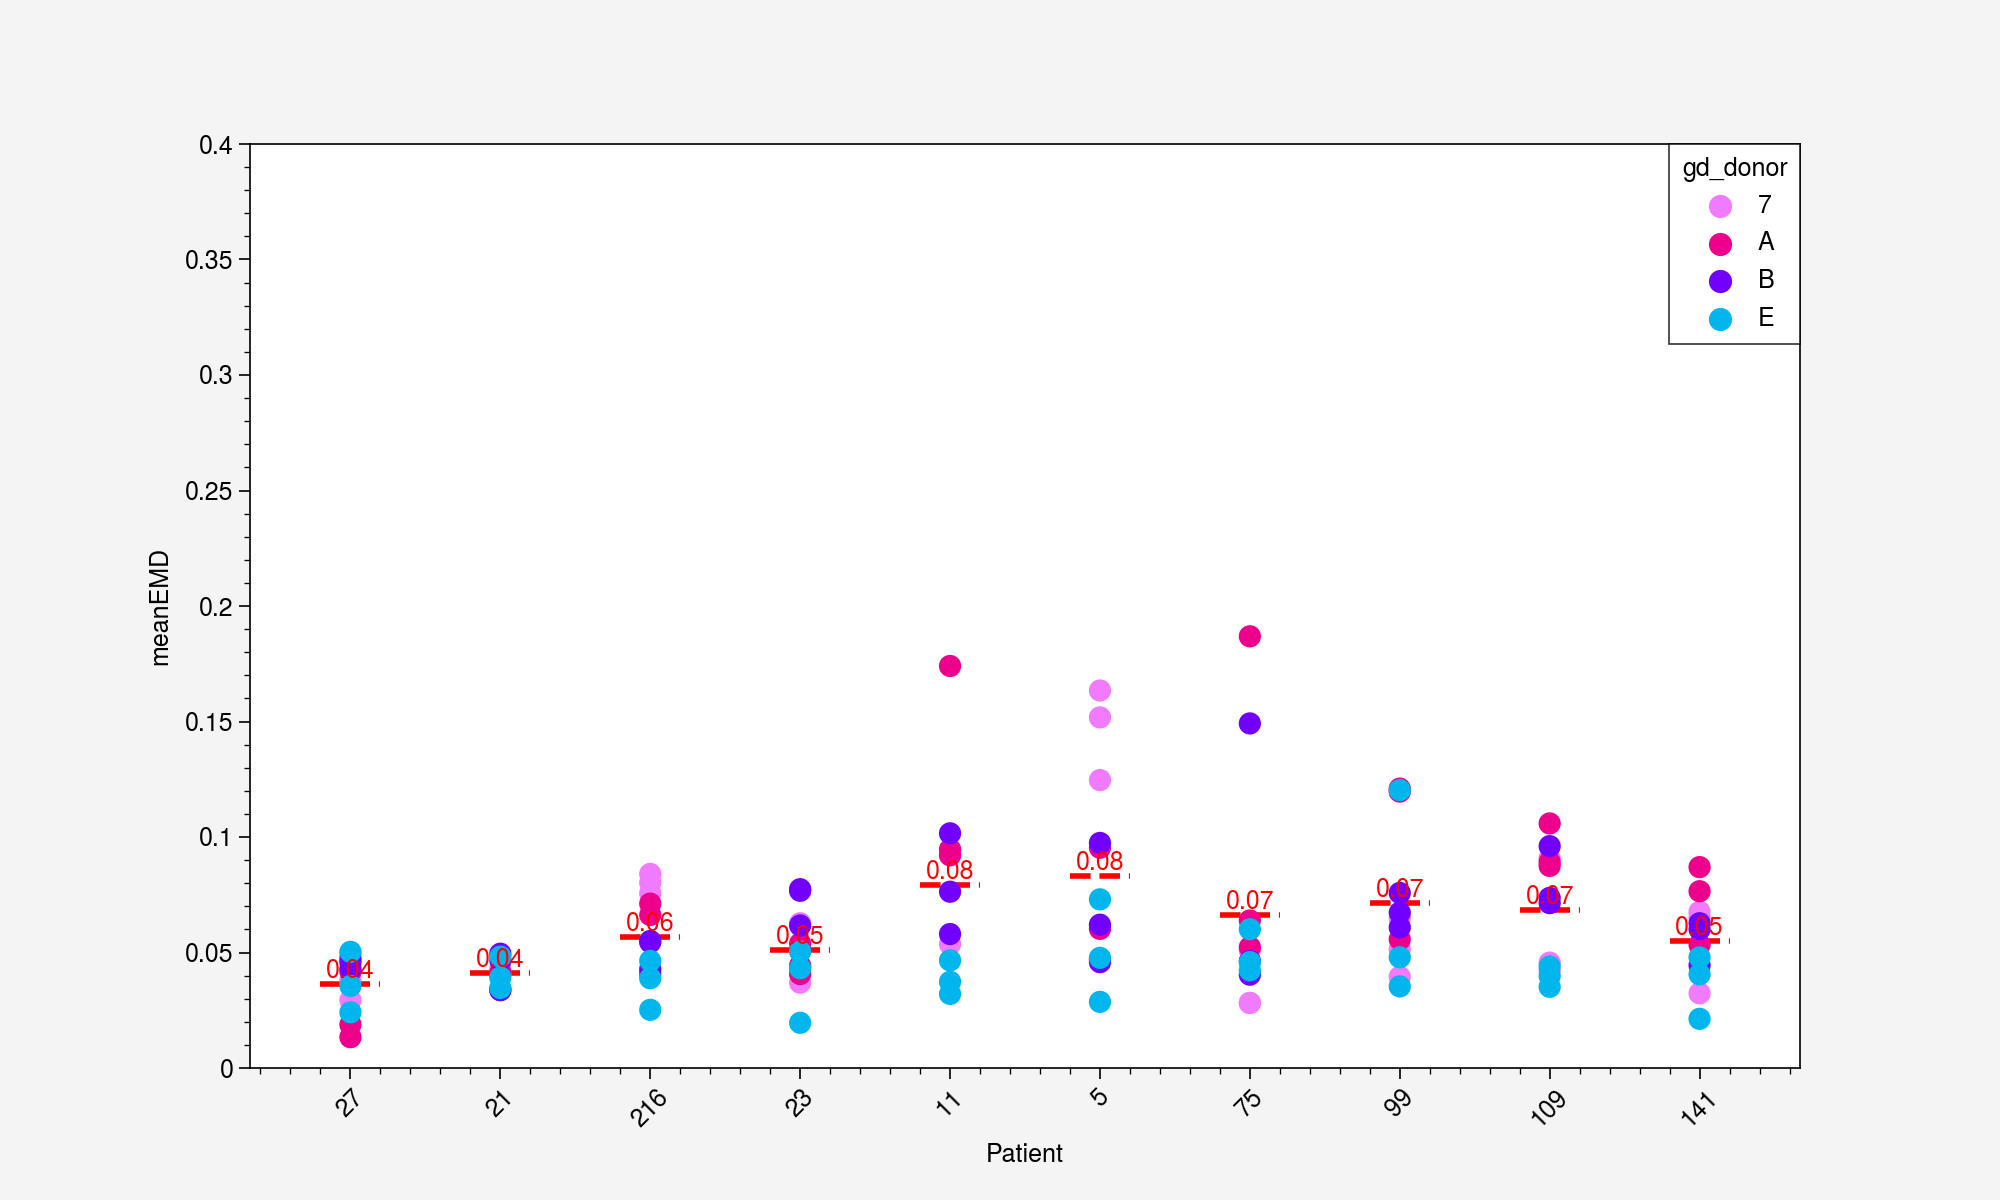

In [39]:
import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}
patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=xEMD_data_ADCC_final,
    x="Patient",
    y="meanEMD",
    jitter=False,  
    size=8,
    hue="gd_donor",
    palette=donor  
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.4)

for donor_group in xEMD_data_ADCC_final['Patient'].unique():
    data_subset = xEMD_data_ADCC_final[xEMD_data_ADCC_final['Patient'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(xEMD_data_ADCC_final['Patient'].unique()).index(donor_group)
    y_coord = mean_value
    
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')

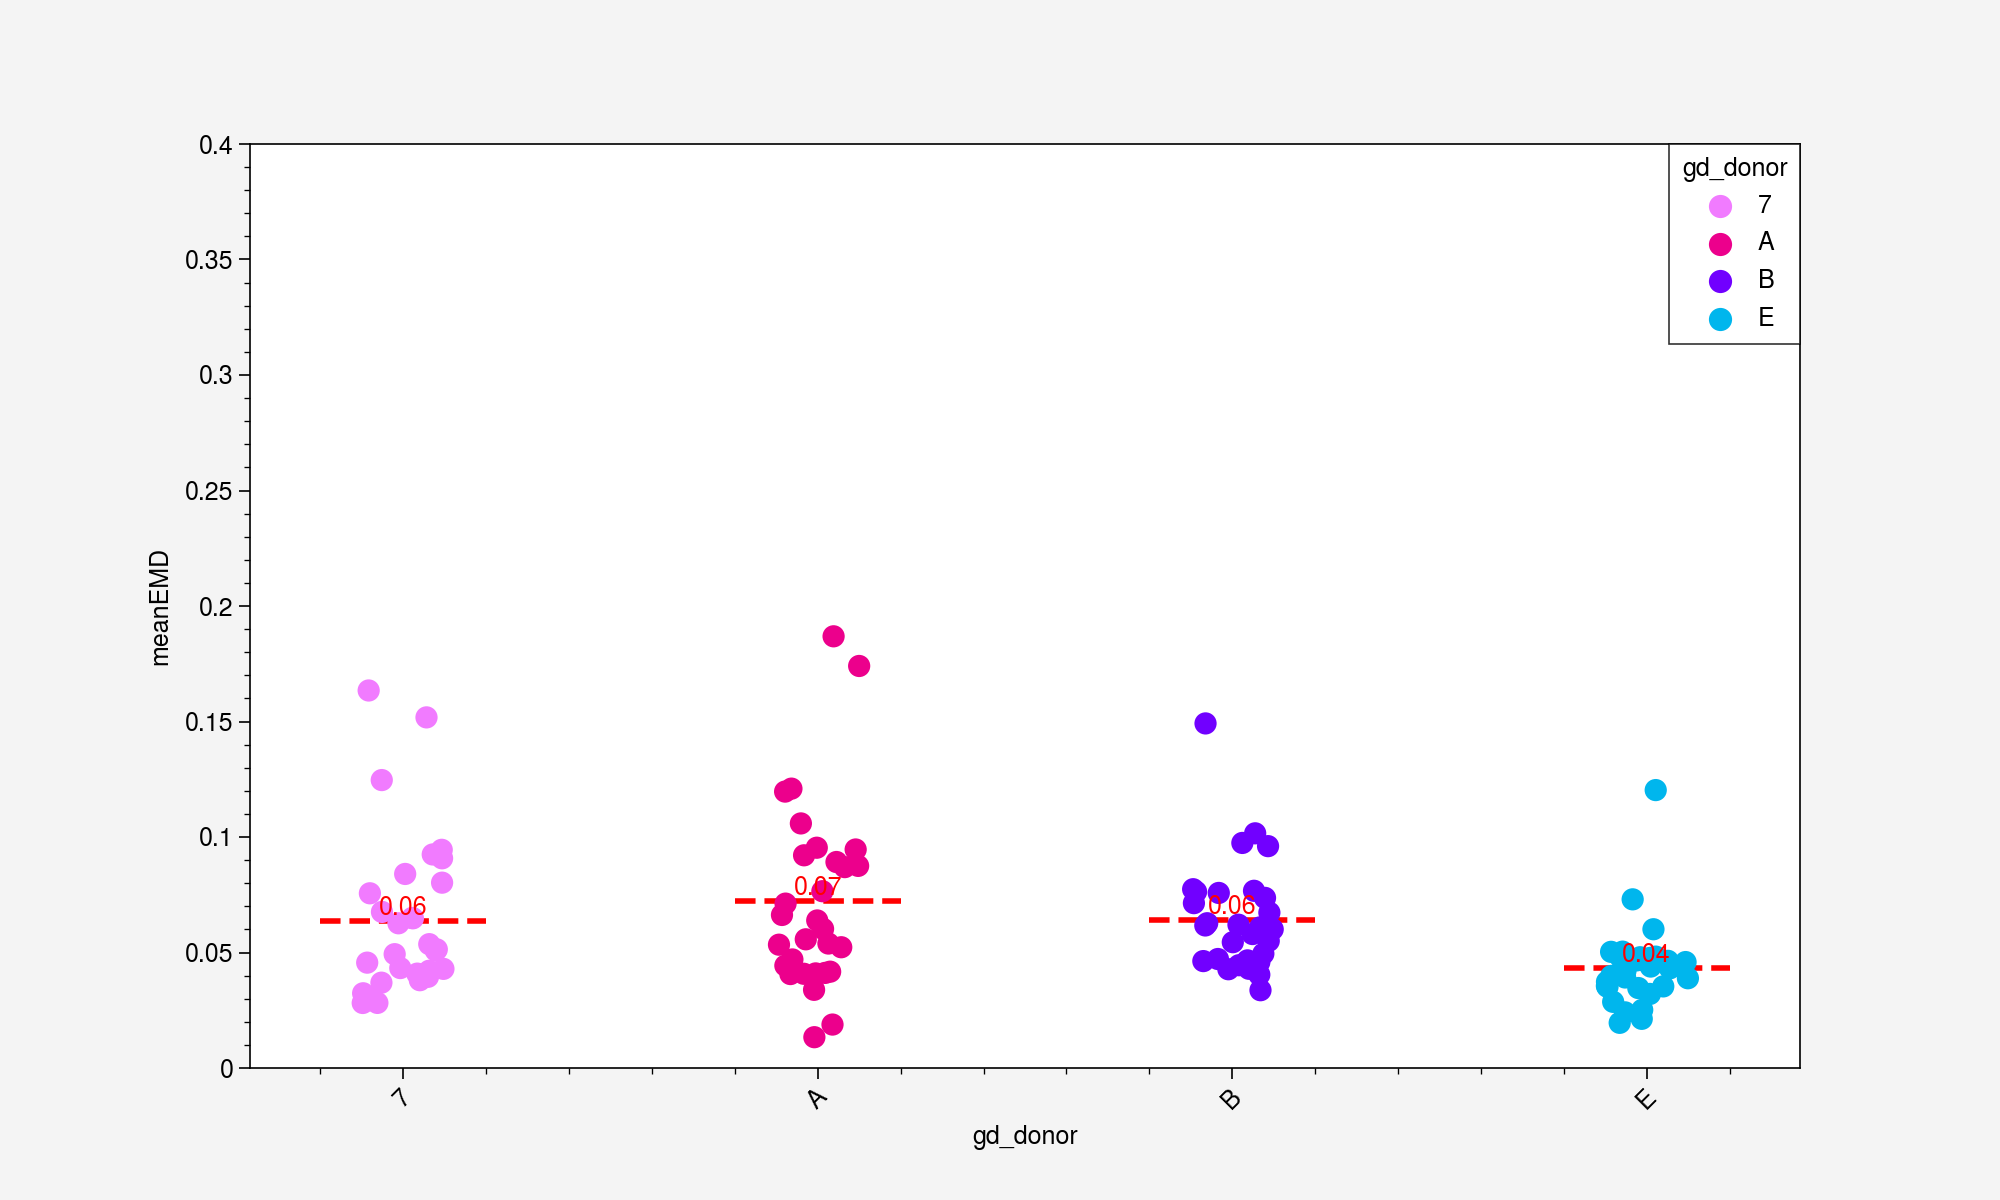

In [41]:
import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}
patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=xEMD_data_ADCC_final,
    x="gd_donor",
    y="meanEMD",
    jitter=True,  
    size=8,
    hue="gd_donor",
    palette=donor  
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.4)

for donor_group in xEMD_data_ADCC_final['gd_donor'].unique():
    data_subset = xEMD_data_ADCC_final[xEMD_data_ADCC_final['gd_donor'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(xEMD_data_ADCC_final['gd_donor'].unique()).index(donor_group)
    y_coord = mean_value
    
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')